In [ ]:
# Install required libraries
!pip install pymc matplotlib ucimlrepo

In [ ]:
# Import necessary libraries
import torch as pt
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, f1_score,roc_curve
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
import pymc as pm
import seaborn as sns
import arviz as az

In [ ]:
# Load dataset
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data as pandas dataframe
df = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features)
df['diagnosis'] = breast_cancer_wisconsin_diagnostic.data.targets['Diagnosis']
# Encode target variable (diagnosis: Malignant=1, Benign=0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


## EDA

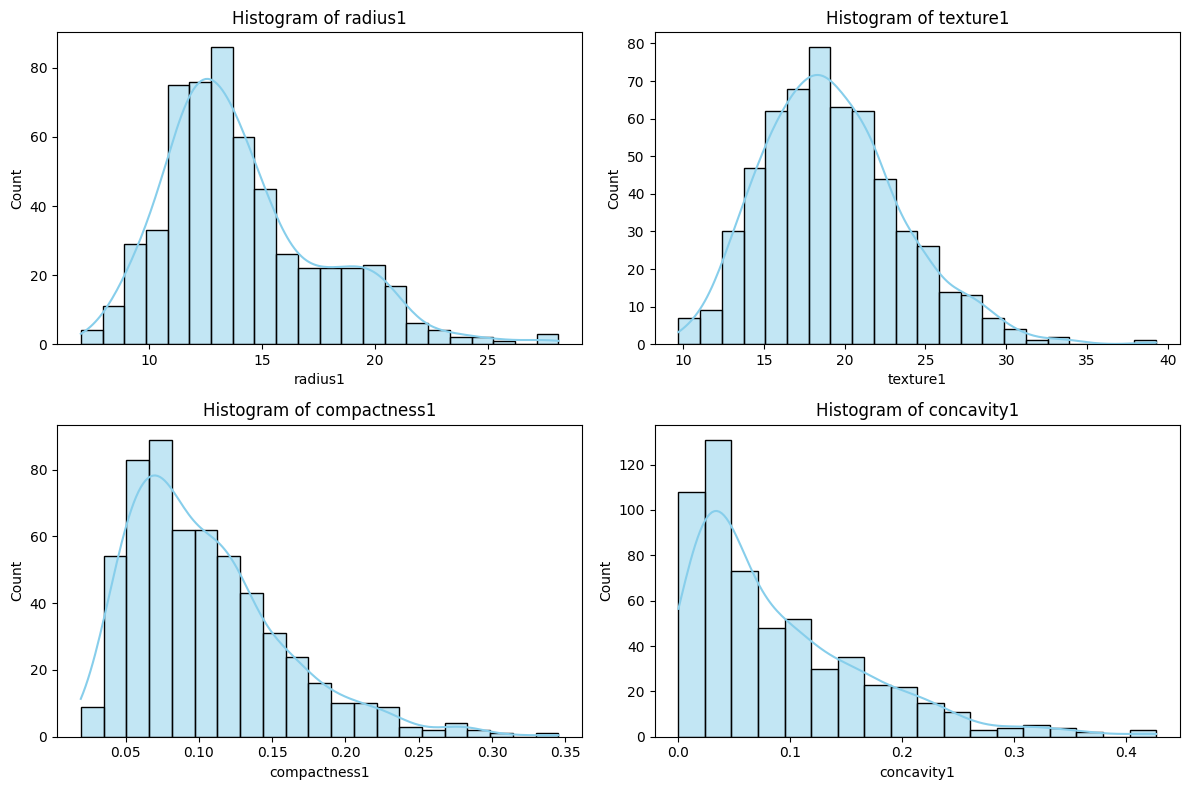

In [ ]:
columns_to_plot = ['radius1', 'texture1', 'compactness1', 'concavity1']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # Flatten the axes array

# Iterate over the columns and create histograms on each subplot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")  # kde=True adds a kernel density estimate
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()  # Adjusts subplot parameters for a tight layout
plt.show()

In [ ]:
print(df.describe)

<bound method NDFrame.describe of      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010  

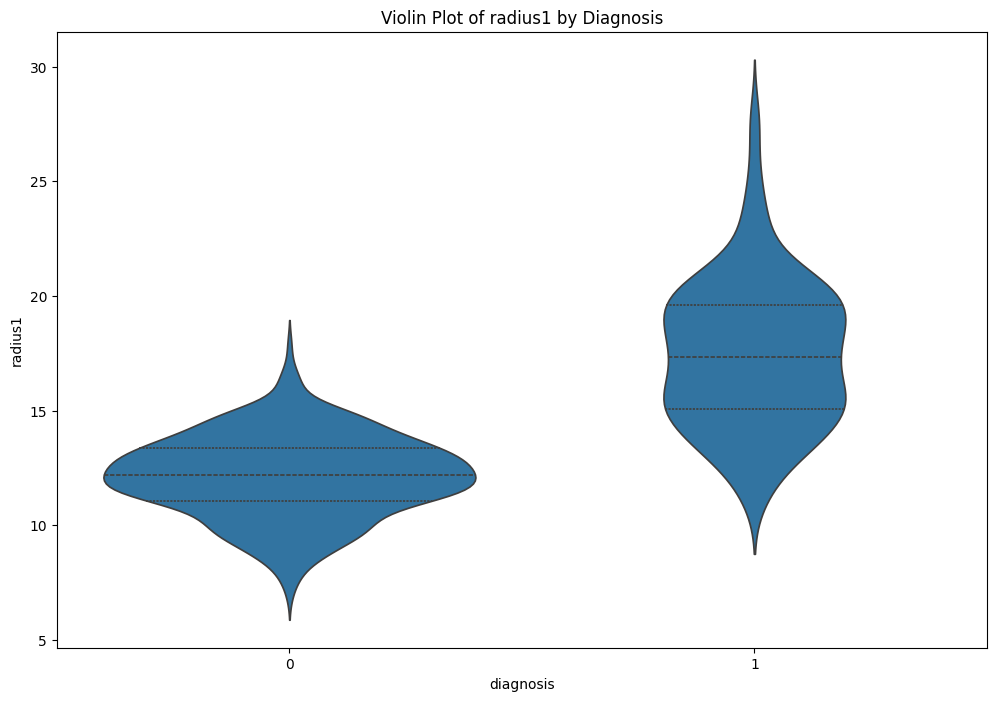

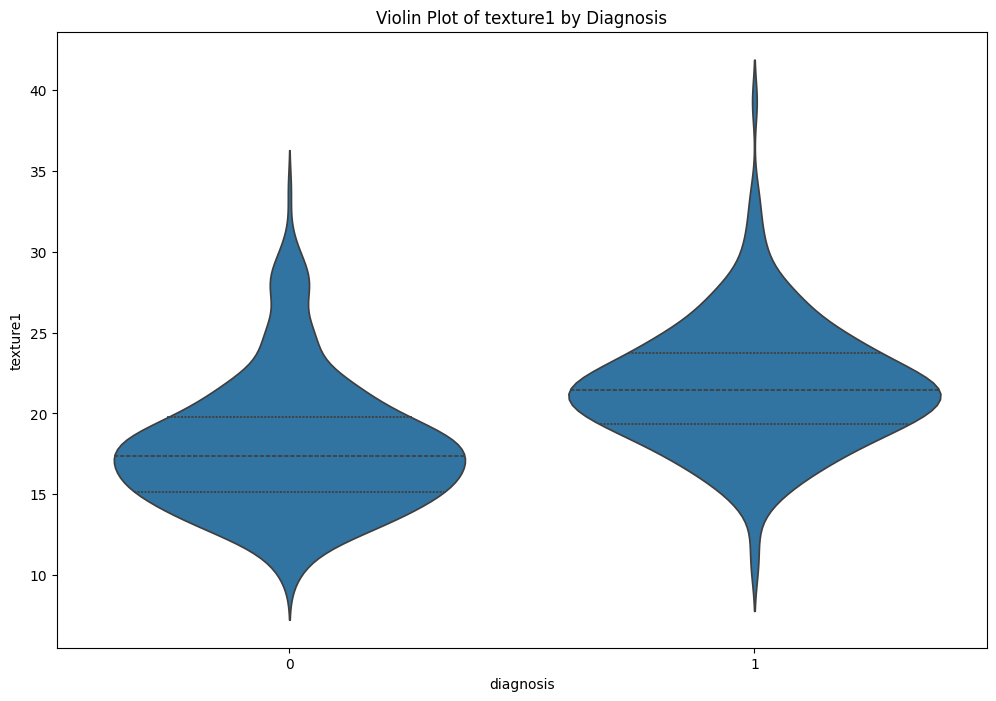

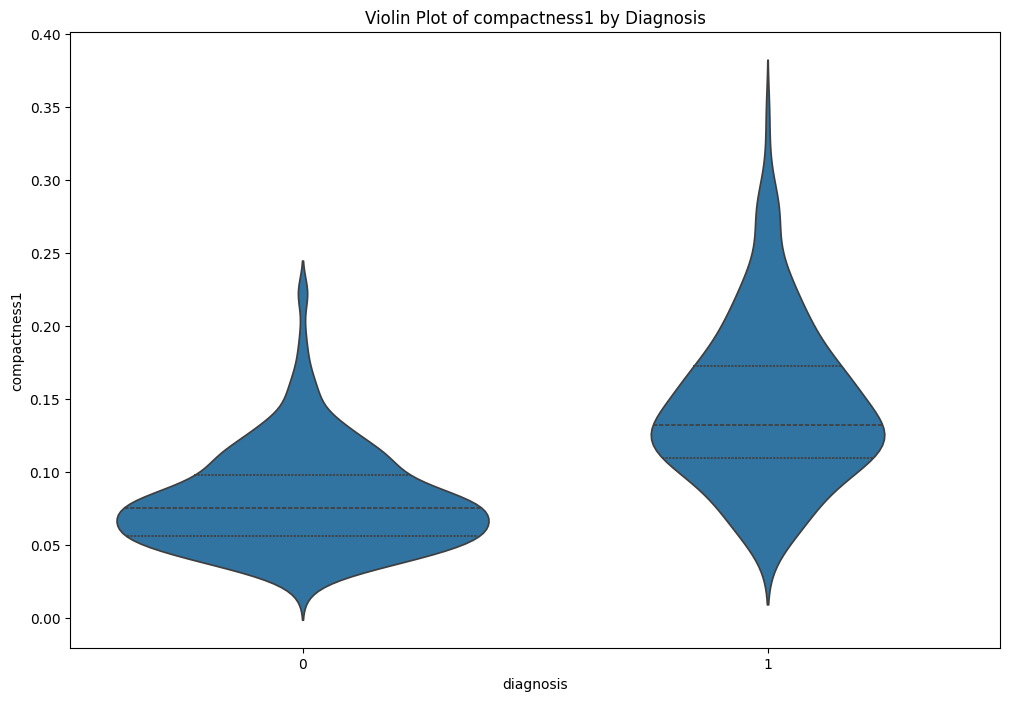

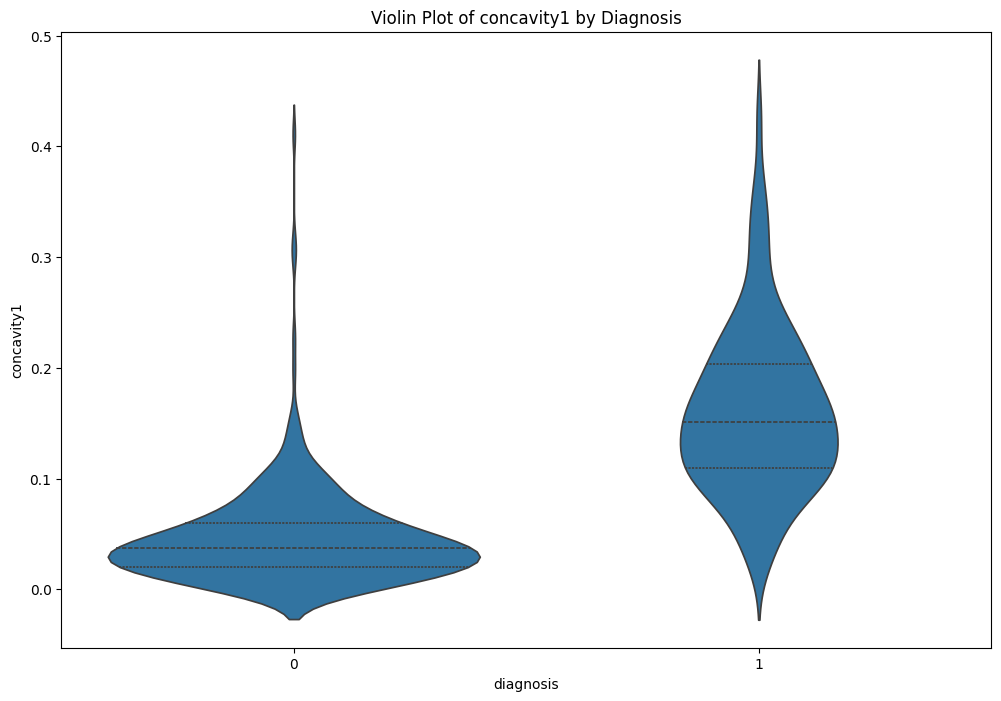

In [ ]:
# Features for the violin plot
features_to_plot = ['radius1', 'texture1', 'compactness1', 'concavity1']

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='diagnosis', y='radius1', data=df, inner="quartile")
plt.title('Violin Plot of radius1 by Diagnosis')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='diagnosis', y='texture1', data=df, inner="quartile")
plt.title('Violin Plot of texture1 by Diagnosis')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='diagnosis', y='compactness1', data=df, inner="quartile")
plt.title('Violin Plot of compactness1 by Diagnosis')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='diagnosis', y='concavity1', data=df, inner="quartile")
plt.title('Violin Plot of concavity1 by Diagnosis')
plt.show()


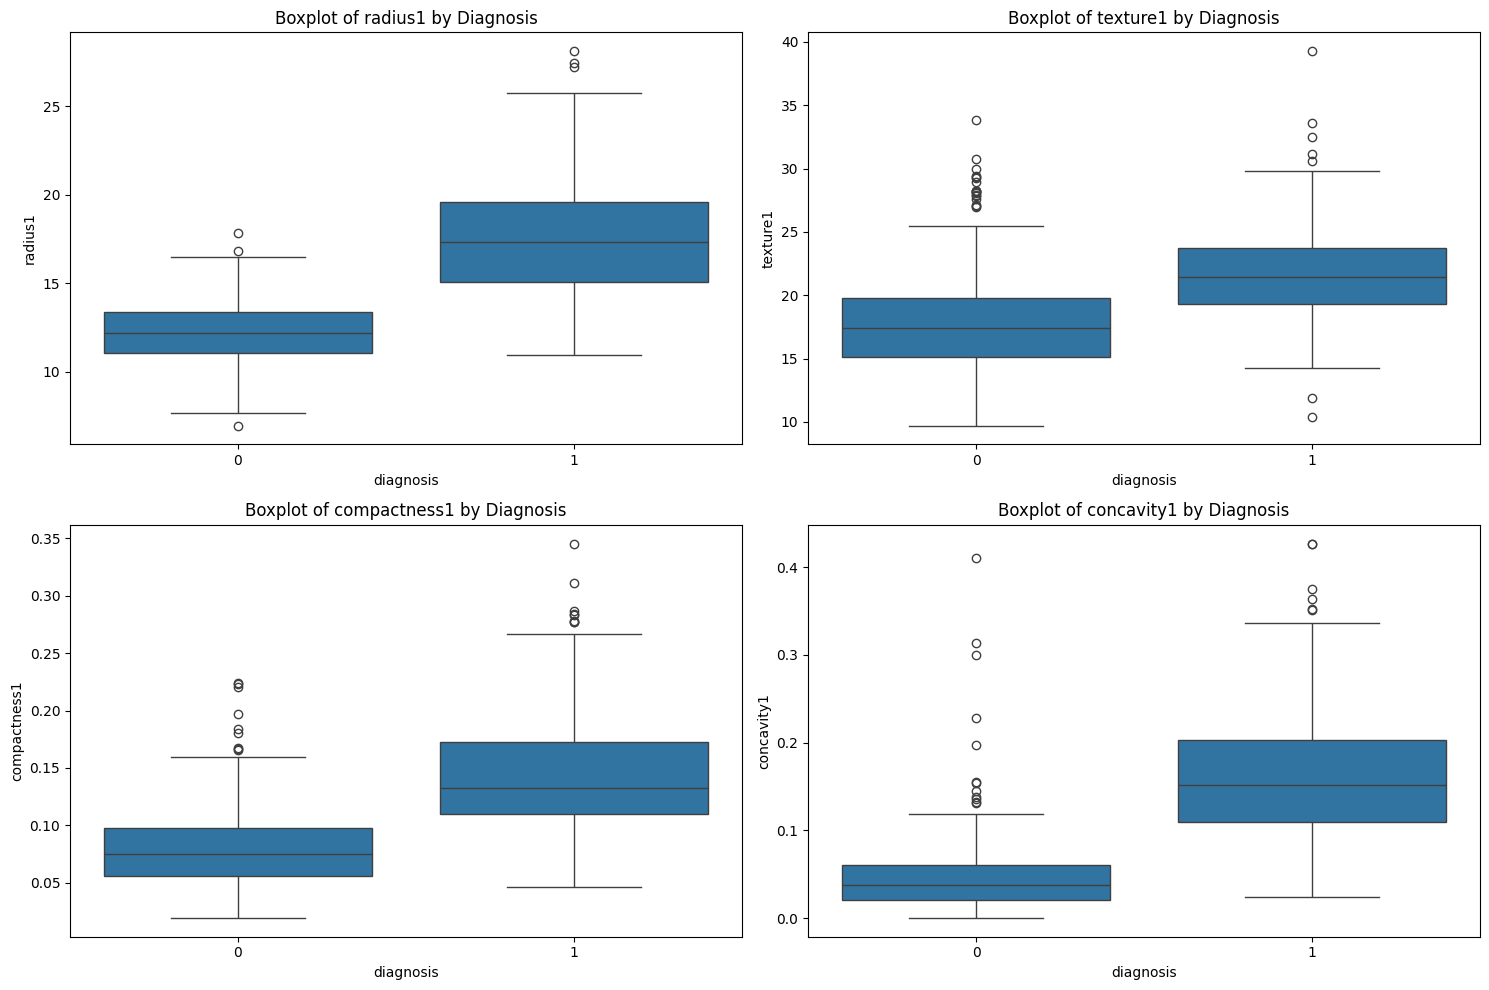

In [ ]:
features_for_boxplot = ['radius1', 'texture1', 'compactness1', 'concavity1']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, feature in enumerate(features_for_boxplot):
    plt.subplot(2, 2, i + 1)  # Create subplots for each feature
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Diagnosis')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

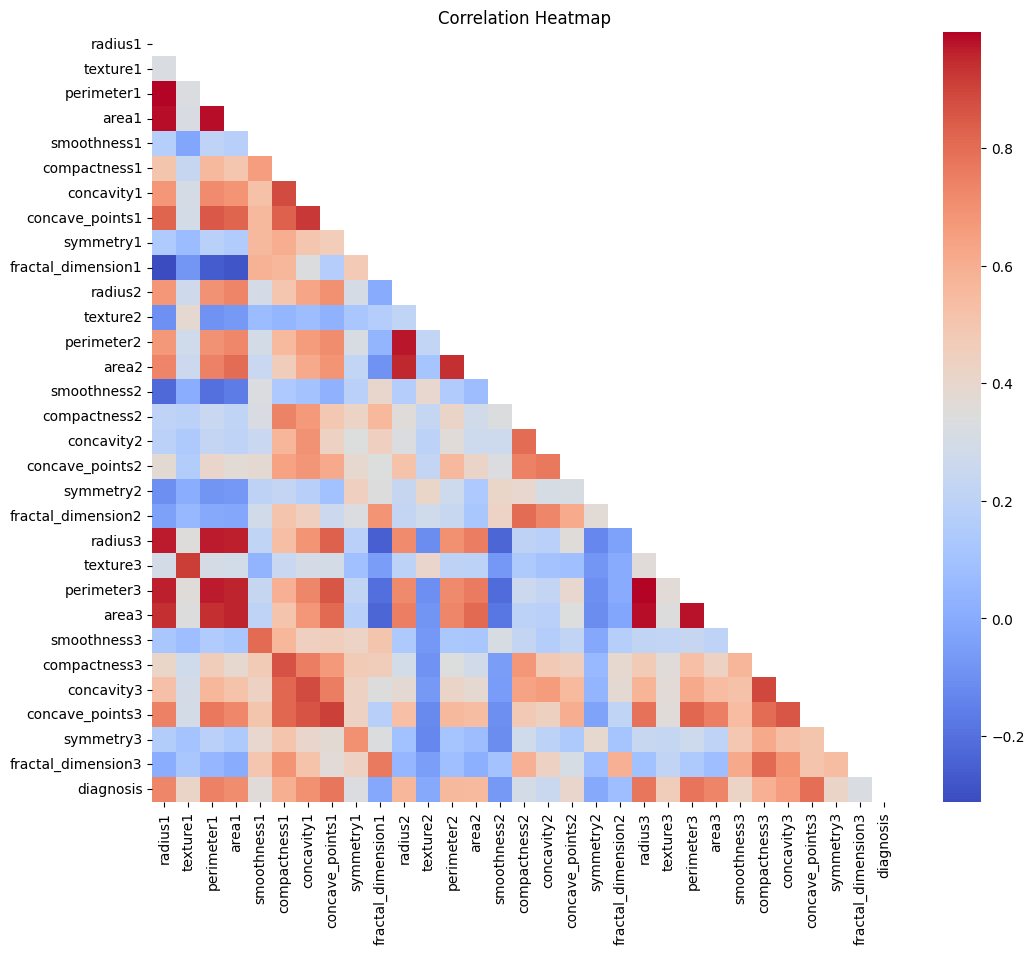

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Heatmap')
plt.show()

### Linear Regression

In [ ]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'diagnosis'],
      dtype='object')

In [ ]:
# Separate predictors and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize predictors for numerical stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Simple Logistic Regression


In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


Confusion Matrix:
[[70  2]
 [ 7 35]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Bayesian Ridge

In [ ]:
bayesian_ridge=BayesianRidge()
bayesian_ridge.fit(X_train,y_train)
ypreds=bayesian_ridge.predict(X_test)
ypreds=np.array(ypreds>0.5,dtype=int)

In [ ]:
print(classification_report(y_test,ypreds))
print(confusion_matrix(y_test,ypreds>0.5))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        72
           1       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114

[[72  0]
 [ 8 34]]


In [ ]:
coefficients = bayesian_ridge.coef_
std_devs = np.sqrt(1 / bayesian_ridge.lambda_)  # Standard deviations of the coefficients

# Compute relative importance
relative_importance = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Display results
for i, (coef, importance) in enumerate(zip(coefficients, relative_importance)):
    print(f"Feature {i + 1}: Coefficient = {coef:.4f}, Std Dev = {std_devs:.4f}, Relative Importance = {importance:.2%}")

Feature 1: Coefficient = -0.1482, Std Dev = 0.2895, Relative Importance = 3.62%
Feature 2: Coefficient = -0.0030, Std Dev = 0.2895, Relative Importance = 0.07%
Feature 3: Coefficient = 0.0033, Std Dev = 0.2895, Relative Importance = 0.08%
Feature 4: Coefficient = 0.0009, Std Dev = 0.2895, Relative Importance = 0.02%
Feature 5: Coefficient = 0.1918, Std Dev = 0.2895, Relative Importance = 4.68%
Feature 6: Coefficient = -0.0656, Std Dev = 0.2895, Relative Importance = 1.60%
Feature 7: Coefficient = 0.2162, Std Dev = 0.2895, Relative Importance = 5.28%
Feature 8: Coefficient = 0.3210, Std Dev = 0.2895, Relative Importance = 7.83%
Feature 9: Coefficient = 0.1556, Std Dev = 0.2895, Relative Importance = 3.80%
Feature 10: Coefficient = 0.0184, Std Dev = 0.2895, Relative Importance = 0.45%
Feature 11: Coefficient = 0.2803, Std Dev = 0.2895, Relative Importance = 6.84%
Feature 12: Coefficient = -0.0100, Std Dev = 0.2895, Relative Importance = 0.24%
Feature 13: Coefficient = 0.0040, Std Dev = 0

In [ ]:
relative_importance
df_importance = pd.DataFrame({'Feature': X_train.columns,
                              'Relative Importance': relative_importance})
selected_features = df_importance[df_importance['Relative Importance'] > 0.001]['Feature'].tolist()
X_selected = X_train[selected_features]
print("Selected Features:", selected_features)

Selected Features: ['radius1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [ ]:
X_train.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

<ipython-input-48-608144d89d2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Feature Importance from Bayesian Ridge Regression')

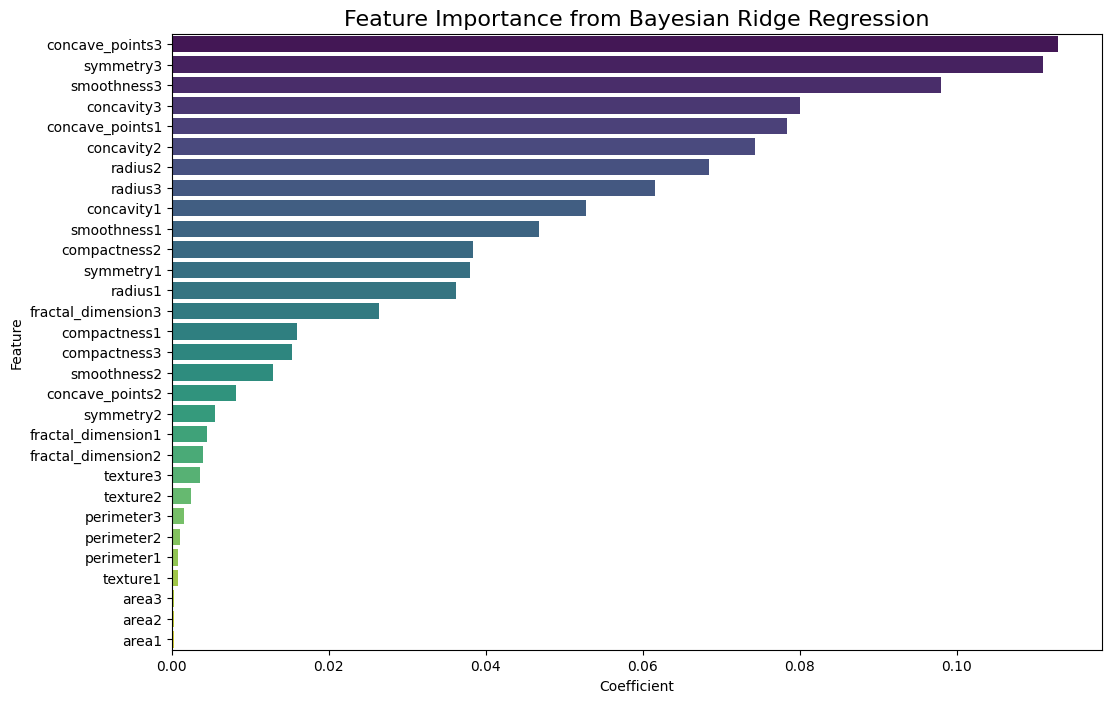

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': relative_importance
}).sort_values(by='Coefficient', ascending=False)
#plot feature importance from logistic regression
plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients,
    x='Coefficient',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance from Bayesian Ridge Regression', fontsize=16)

## Bayesian Logistic Regression

In [ ]:
X_train,X_test= X_train[selected_features],X_test[selected_features]

In [ ]:
# Latent Variable Analysis
RANDOM_STATE=42
with pm.Model() as latent_model:

    #Setting the Training Data
    X=pm.MutableData("X",X_train)
    y=pm.MutableData("y",y_train)


    # Priors for regression coefficients and intercept
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_train.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Latent variable
    z = pm.Deterministic("z", pm.math.dot(X, beta) + intercept)

    # Link function (sigmoid) to get probabilities
    p = pm.Deterministic("p", pm.math.sigmoid(z))

    # Likelihood (Bernoulli for binary diagnosis)
    diagnosis = pm.Bernoulli("diagnosis", p=p, observed=y)

    # Inference
    trace = pm.sample(2000,tune=1000, return_inferencedata=True,random_state=RANDOM_STATE,target_accept=0.95)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


Output()

ERROR:pymc.stats.convergence:There were 2000 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


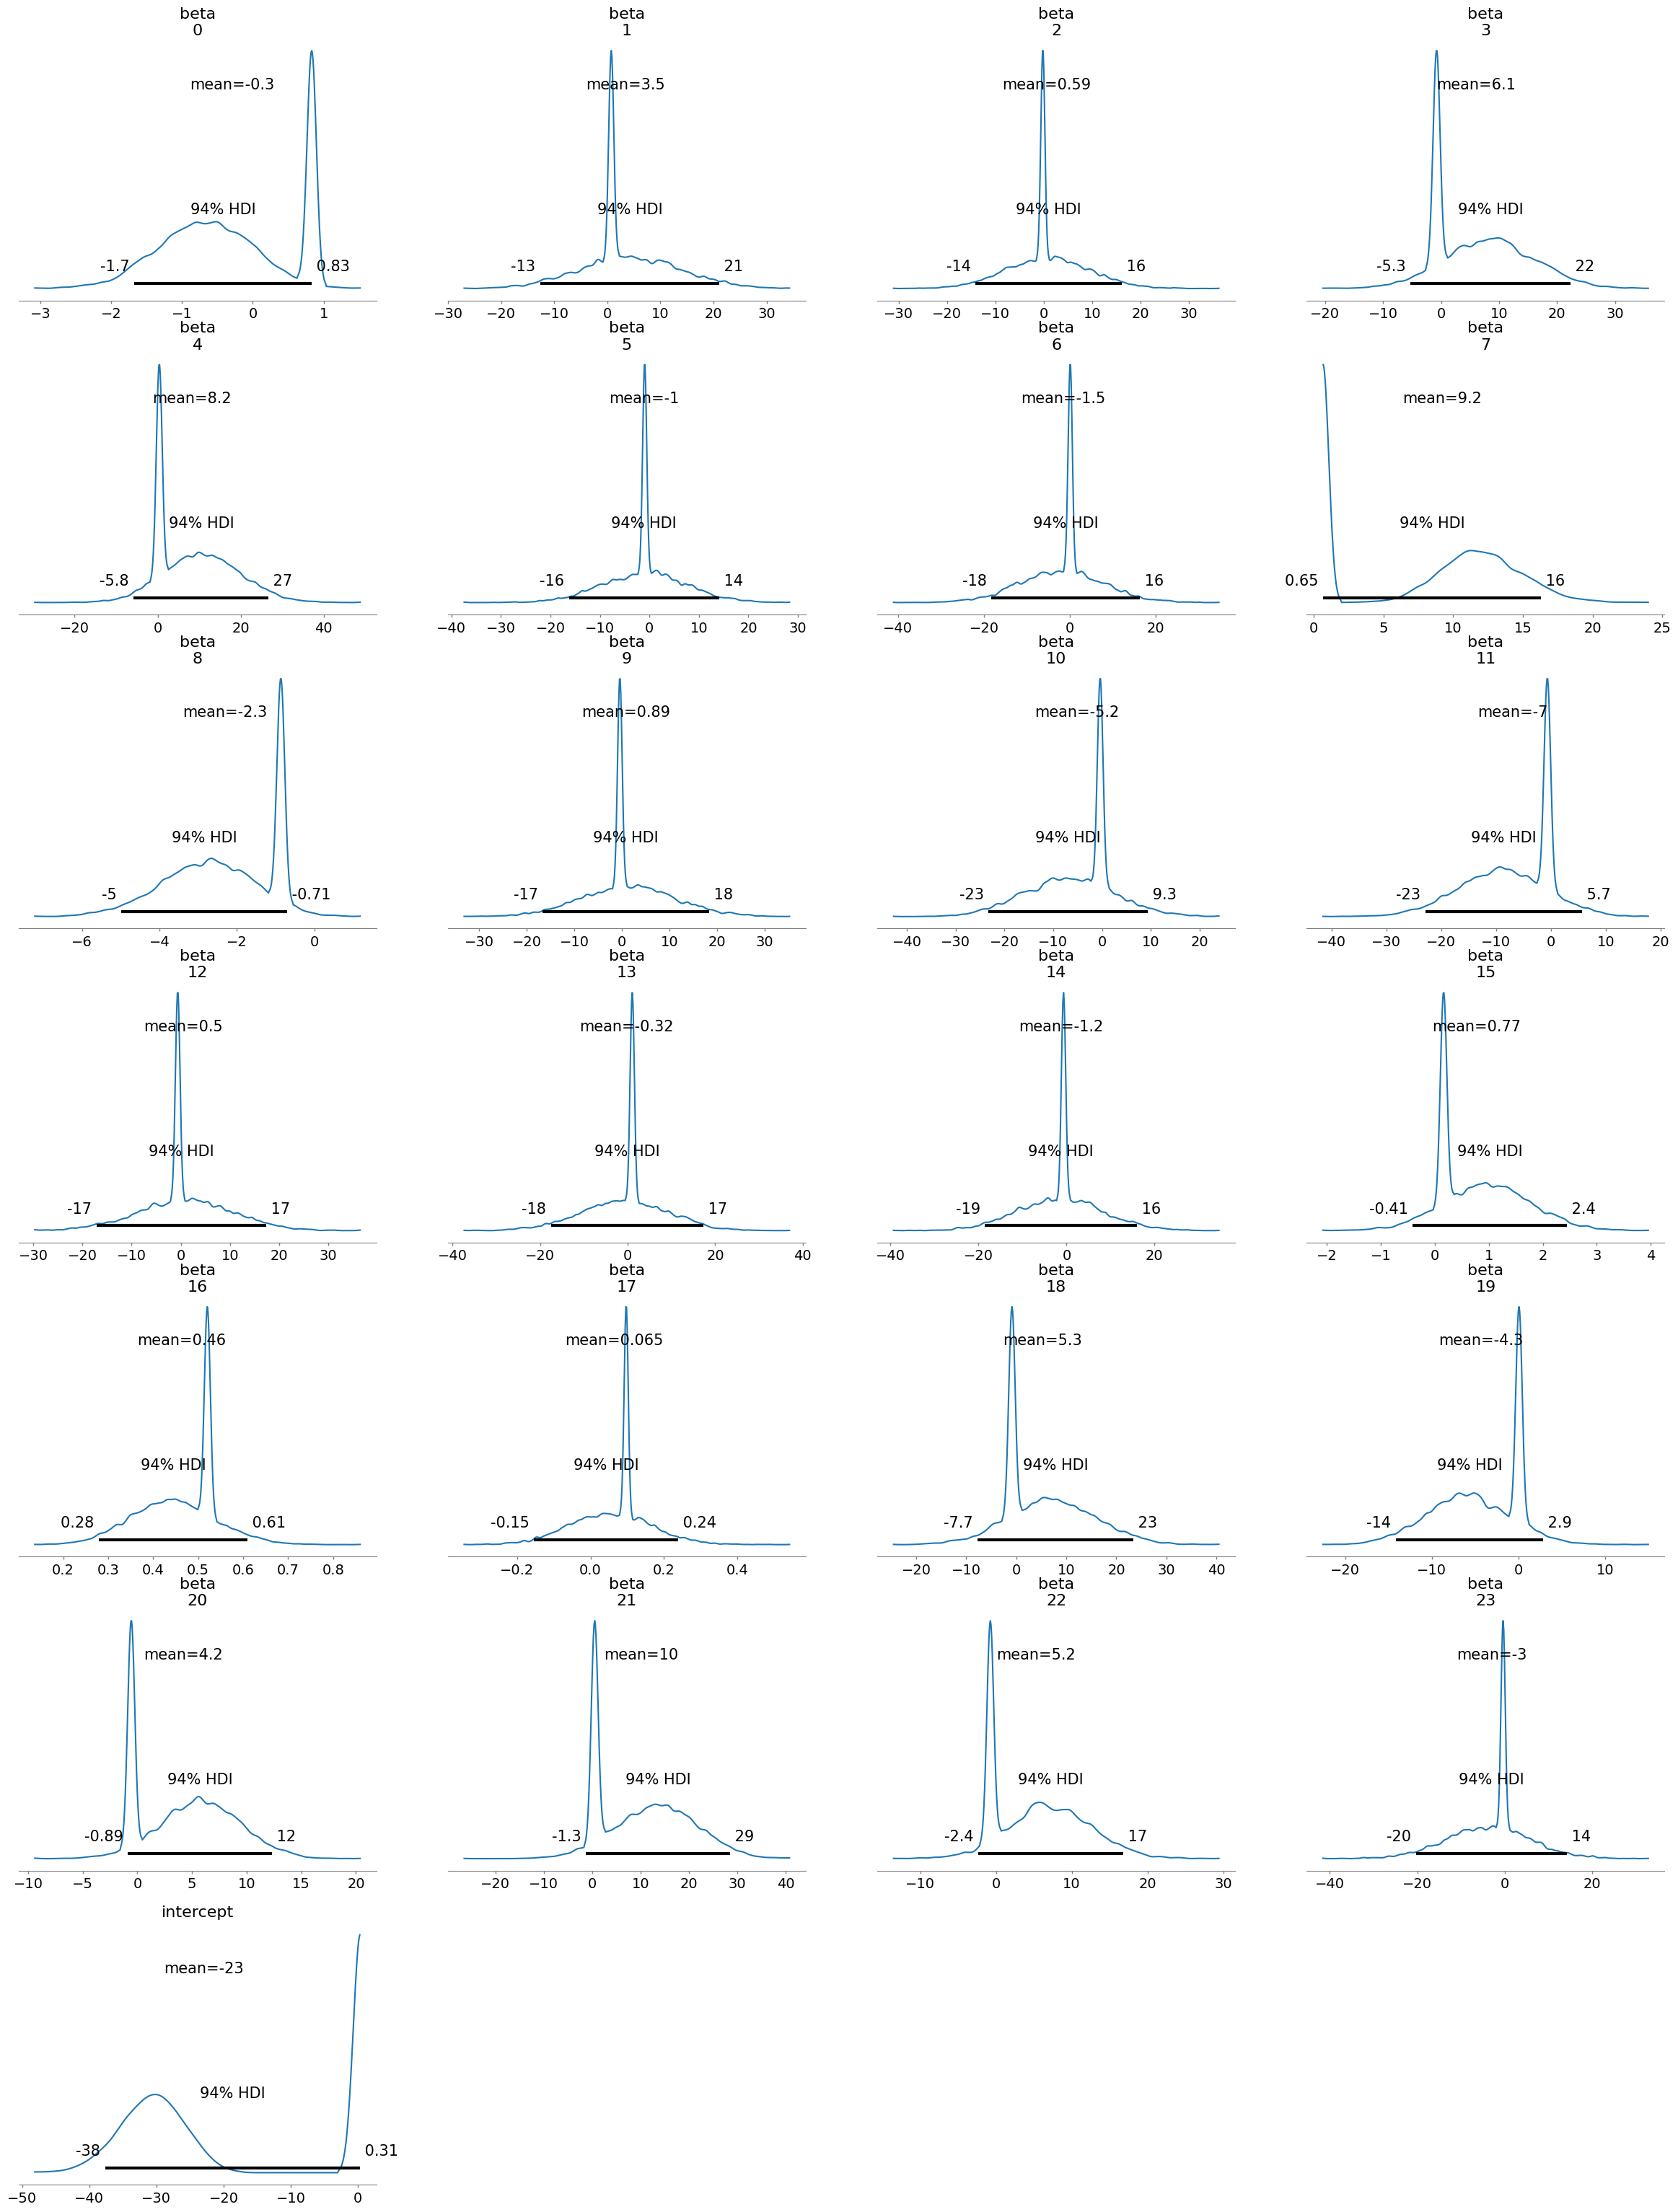

In [ ]:
#Posterior Analysis

# Summarize posterior distributions
az.summary(trace)

# Plot posterior distributions for regression coefficients
az.plot_posterior(trace, var_names=["beta", "intercept"])
plt.show()

In [ ]:
# Predictive Analysis
# Generate posterior predictive samples
with latent_model:
    # Set test data
    pm.set_data({"X": X_test})
    pm.set_data({"y": y_test})
    #Posterior Prediction samples
    posterior_predictive = pm.sample_posterior_predictive(trace)
print(posterior_predictive.posterior_predictive['diagnosis'])


Output()

<xarray.DataArray 'diagnosis' (chain: 4, draw: 2000, diagnosis_dim_2: 114)> Size: 7MB
array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 1, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 1],
        ...,
        [0, 1, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 1, 1]],

       [[0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 1],
        ...,
        [0, 1, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 1, 1]],

       [[0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 0, 1],
        [0, 1, 0, ..., 0, 1, 1],
        ...,
        [0, 1, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 1]]])
Coordinates:
  * chain            (chain) int64 32B 0 1 2 3
  

In [ ]:
# Extract predicted probabilities
predicted_probs = posterior_predictive.posterior_predictive["diagnosis"].mean(axis=0).mean(axis=0)


Optimal Threshold (ROC Curve): 0.51
Optimal Threshold (Precision-Recall Curve): 0.51


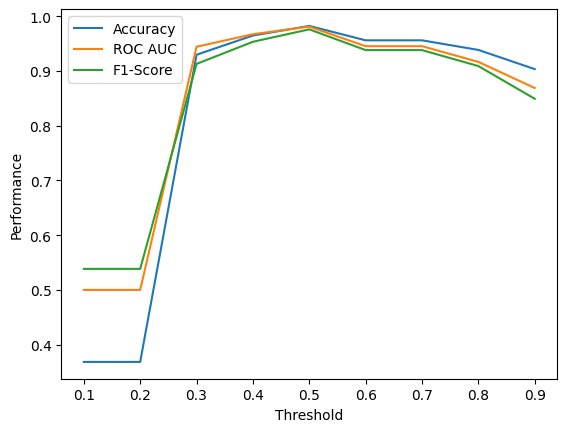

In [ ]:

fpr, tpr, thresholds_roc = roc_curve(y_test, predicted_probs)
optimal_idx_roc = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold_roc = thresholds_roc[optimal_idx_roc]
# Threshold Optimization using Precision-Recall Curve and F1-Score
precision, recall, thresholds_pr = precision_recall_curve(y_test, predicted_probs)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_idx_pr = np.argmax(f1_scores)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]

# Comparing Performance at Different Thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
roc_auc_scores = []
f1_scores = []

for threshold in thresholds:
    predicted_classes = (predicted_probs > threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, predicted_classes))
    roc_auc_scores.append(roc_auc_score(y_test, predicted_classes))
    f1_scores.append(f1_score(y_test, predicted_classes))

# Print optimal thresholds and performance metrics
print(f"Optimal Threshold (ROC Curve): {optimal_threshold_roc:.2f}")
print(f"Optimal Threshold (Precision-Recall Curve): {optimal_threshold_pr:.2f}")

# Plot the performance metrics against thresholds for visualization
import matplotlib.pyplot as plt

plt.plot(thresholds, accuracy_scores, label="Accuracy")
plt.plot(thresholds, roc_auc_scores, label="ROC AUC")
plt.plot(thresholds, f1_scores, label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Performance")
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[71  1]
 [ 2 40]]

Accuracy: 0.97

ROC AUC Score: 0.97


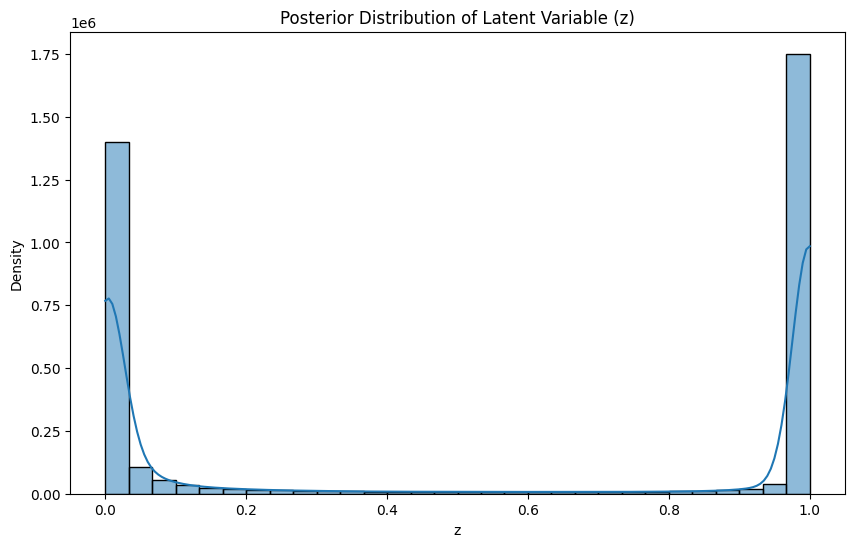

In [ ]:

# Threshold probabilities to get binary predictions
predicted_classes = (predicted_probs > optimal_threshold_pr).astype(int)

# Evaluate Model Performance

print("Classification Report:")
print(classification_report(y_test, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"\nAccuracy: {accuracy:.2f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, predicted_classes)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Visualize Latent Variable (z) Distribution
plt.figure(figsize=(10, 6))
sns.histplot(trace.posterior["p"].values.flatten(), kde=True, bins=30)
plt.title("Posterior Distribution of Latent Variable (z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

## Bayesian Logistic Predictive Check

In [ ]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

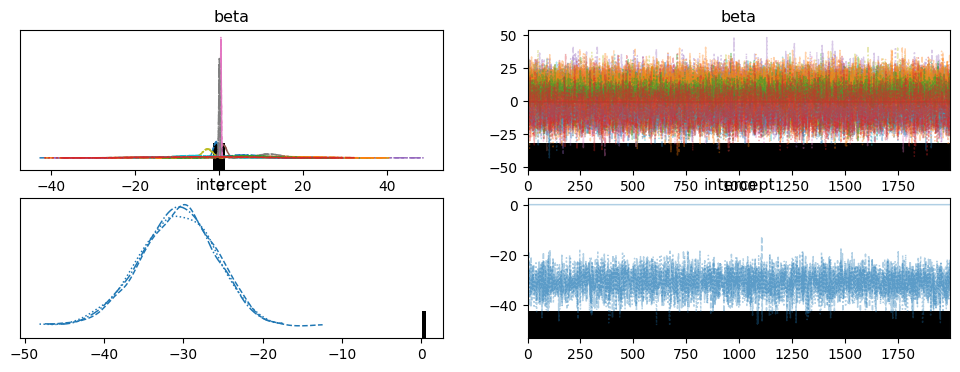

In [ ]:
az.plot_trace(trace, var_names=["beta", "intercept"])

Code, research, and report by Harsh, Avantika, and Ameya.